In [0]:
'''

#Enable GPU for this Exercise.

'''

In [0]:
'''
Exercise - I have given a sample Autoencoder code here. The code works perfectly but does not implement all the recommendations specified
in the HW problem. You have to use the code below as a sample and make sure you are implementing all the recommendations.

'''

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

mnist_data = datasets.MNIST('data', train=True, download=True, transform=transforms.ToTensor())
mnist_data = list(mnist_data)[:4096]

In [0]:
'''

I have deliberately not specified a max pool layer. It is super easy. I expect you to lookup online and understand the simple specification of
max pool layer.

'''

class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential( 
            nn.Conv2d(1, 16, (5,5), stride=2, padding=2),
            nn.ReLU(),
            nn.Conv2d(16, 32, (5,5), stride=2, padding=2),
            nn.ReLU(),
            nn.Conv2d(32, 64, 7)
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, 7),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 1, 3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [0]:
'''

Exercise - Play around with batch size and learning rate. Report the best parameters.

'''


def train(model, num_epochs=5, batch_size=64, learning_rate=1e-3):
    torch.manual_seed(6)

    criterion = nn.MSELoss() # mean square error loss

    optimizer = torch.optim.Adam(model.parameters(),
                                 lr=learning_rate, 
                                 weight_decay=1e-5)


'''
Exercise - I haven't specified any image transformations in the data loader. See if image transformation will help?

'''

    train_loader = torch.utils.data.DataLoader(mnist_data, 
                                               batch_size=batch_size, 
                                               shuffle=True)
    outputs = []
    for epoch in range(num_epochs):
        for data in train_loader:
            img, _ = data
            recon = model(img)
            loss = criterion(recon, img)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        print('Epoch:{}, Loss:{:.4f}'.format(epoch+1, float(loss)))
        outputs.append((epoch, img, recon),)
    return outputs


In [35]:
model = Autoencoder()
max_epochs = 20
outputs = train(model, num_epochs=max_epochs)

Epoch:1, Loss:0.0737
Epoch:2, Loss:0.0632
Epoch:3, Loss:0.0614
Epoch:4, Loss:0.0420
Epoch:5, Loss:0.0299
Epoch:6, Loss:0.0278
Epoch:7, Loss:0.0221
Epoch:8, Loss:0.0176
Epoch:9, Loss:0.0154
Epoch:10, Loss:0.0137
Epoch:11, Loss:0.0153
Epoch:12, Loss:0.0126
Epoch:13, Loss:0.0113
Epoch:14, Loss:0.0109
Epoch:15, Loss:0.0097
Epoch:16, Loss:0.0098
Epoch:17, Loss:0.0084
Epoch:18, Loss:0.0086
Epoch:19, Loss:0.0078
Epoch:20, Loss:0.0078


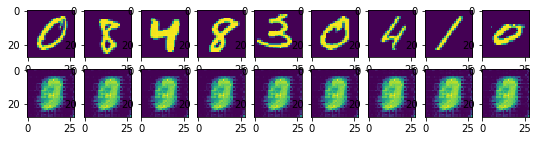

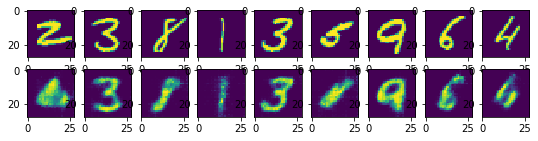

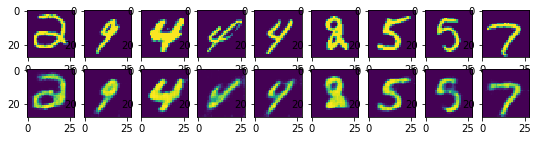

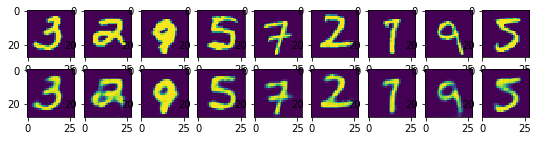

In [36]:
'''

Notice how as as train longer the autoencoder becomes better and better. i.e. reconstructions are closer and closer to the original images.

Exercise - Once you implement all the recommendations you will get something like this, in fact, much better because of your implementations.

'''


for k in range(0, max_epochs, 5):
    plt.figure(figsize=(9, 2))
    imgs = outputs[k][1].detach().numpy()
    recon = outputs[k][2].detach().numpy()
    for i, item in enumerate(imgs):
        if i >= 9: break
        plt.subplot(2, 9, i+1)
        plt.imshow(item[0])
        
    for i, item in enumerate(recon):
        if i >= 9: break
        plt.subplot(2, 9, 9+i+1)
        plt.imshow(item[0])